In [205]:
%matplotlib inline
import skimage.io
import skimage.filters
from pathlib import Path
import random
from matplotlib import pyplot as plt
import skimage.color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.transform import hough_line, hough_line_peaks
from skimage.feature import canny
from skimage.draw import line
from matplotlib import cm
from skimage.feature import corner_harris, corner_subpix, corner_peaks
from skimage.measure import profile_line

# Dataset

Udělal jsem si adresář s vytípanými snímky z videí

In [206]:
dataset_path = Path(r"H:\biomedical\orig\pigleg_surgery\incision2022")

# Hough circle

* Dost často tam hledaná kružnice je, jen je v záplavě ostatních
* Houghova transformace pracuje dobře, pokud má na vstupu většinou nuly a na hranách kladná čísla. Laplace ale produkuje i záporná čísla. Proto je nutné udělat `np.abs`. 
* Z nějakého nepochopitelného důvodu pracuje Hough na vstupu jen celočíselným datovým typem. Proto to násobím 100 a přetypovávám.
* Já hledám dost širokou škálu poloměrů, vy budete vědět, jak velký máte bounding box, tak to můžete omezit
* Poslední obrázke ukazuje, jak moc je na kterém místě "pravděpodovné", že je tam kružnice s nejmenším poloměrem


[10 11 12 13 14 16 18 21 23 24 26 30 31 34 35 37]


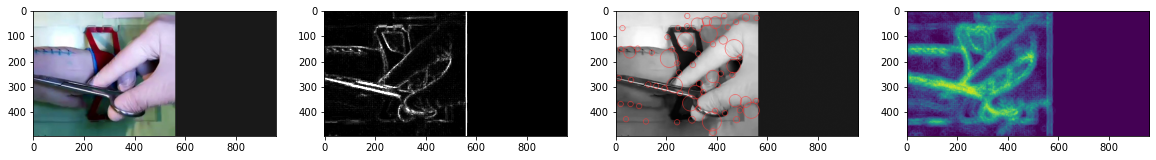

[10 11 12 13 14 15 19 20 21 23 24 25 26 27 28 30 31 32 35 36 37 38 39]


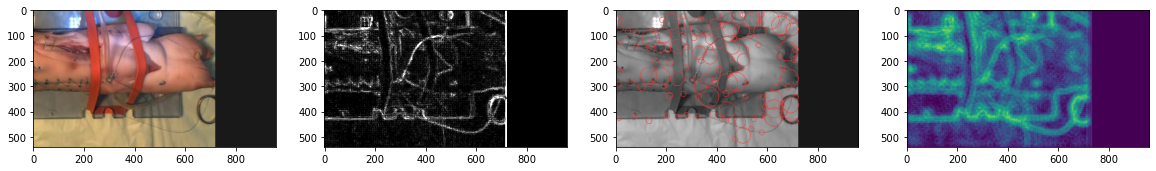

[10 11 12 13 15 16 17 19 20 22 24 27 29 30 31 32 33 36 37]


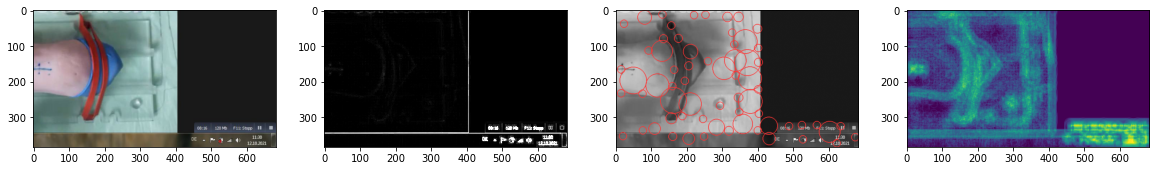

[10 11 12 13 14 17 19 20 23 25 27 28 29 30 31 32 33 34 35 36 37]


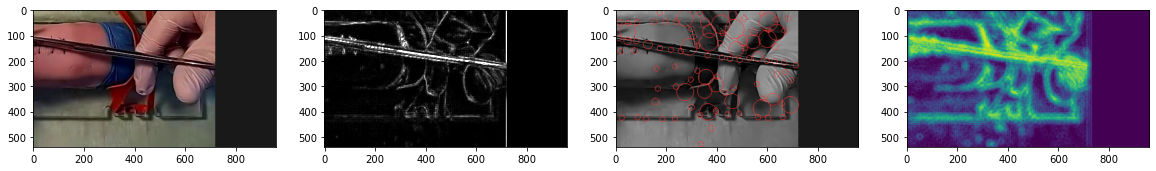

[10 11 12 13 15 18 22 23 24 25 26 27 28 29 30 31 33 34 35 36 38]


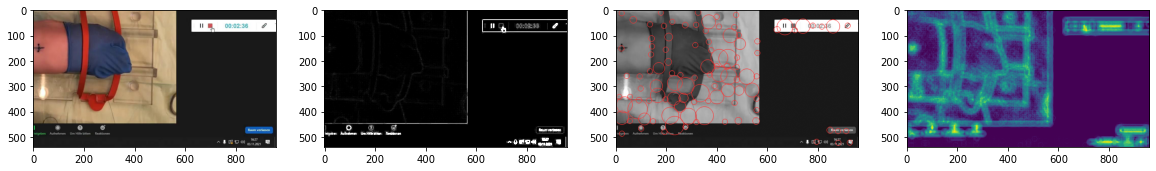

In [214]:
for pth in random.sample(list(dataset_path.glob("*")), 5):
    fig, axs = plt.subplots(1,4, figsize=(20,5))
    axs = axs.flatten()
    
    im = skimage.io.imread(pth)
    sh = im.shape
    # náhodně vyříznu menší část obrázku, abych na náhledech vůbec něco viděl
    imcrop = im[int(sh[0]/2):,int(sh[1]/2):]
    axs[0].imshow(imcrop)
    
    image = skimage.color.rgb2gray(imcrop)
    
    # Tři různé hranové operátory - přesvědčivě nefunguje žádný
    # edges = (100*skimage.filters.roberts(image)).astype(np.uint8)
    # edges = (100*skimage.filters.sobel(image)).astype(np.uint8)
    edges = np.abs(100 * skimage.filters.laplace(image)).astype(np.uint8)
    # edges = canny(image, sigma=0, low_threshold=0.1)
    p = np.percentile(edges.ravel(), 99)
    axs[1].imshow(edges, cmap='gray', clim=[0, p])
    # axs[1].colorbar()
    
    
    # Hough transform
    
    # Hledané poloměry v pixelech - od 10 do 40
    hough_radii = np.arange(10, 40, 1)
    hough_res = hough_circle(edges.astype(float), hough_radii)

    # Select the most prominent 3 circles
    accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                               # total_num_peaks=3, 
                                               min_xdistance=30,
                                               min_ydistance=30,
                                               threshold=0.5 * np.max(hough_res),
                                               normalize=True)

    # Draw them
    image = color.gray2rgb(image)
    print(np.unique(radii))
    for center_y, center_x, radius in zip(cy, cx, radii):
        # print(radius)
        circy, circx = circle_perimeter(center_y, center_x, radius, shape=image.shape)
        image[circy, circx] = (1, 0.2, .2)
        
        circy, circx = circle_perimeter(center_y, center_x, radius+1, shape=image.shape)
        image[circy, circx] = (1, 0.2, .2)

    axs[2].imshow(image, cmap=plt.cm.gray)
    
    axs[3].imshow(hough_res[0,:,:])
    
    plt.show()

# Hough line

* Možná by šlo odhadovat rozlišení podle vzdálenosti horizontálních čar
* vynechávání dokonale svislých a dokonale vodorovných čar musím dělat kvůli GUI zoomu. Vy budete mít výřezy, takže tohle budete moci ignorovat

line angle=-1.5446163880149817, dist=-1007.0
line angle=-1.5446163880149817, dist=-576.0
line angle=-0.01745329251994332, dist=1594.0
line angle=1.562069680534925, dist=806.0
line angle=1.562069680534925, dist=957.0
line angle=1.439896632895322, dist=1074.0
line angle=-0.7853981633974483, dist=610.0
line angle=-1.5446163880149817, dist=-858.0
line angle=0.01745329251994332, dist=1680.0
line angle=0.03490658503988664, dist=566.0
line angle=1.562069680534925, dist=350.0
line angle=0.008726646259971771, dist=245.0
line angle=1.5184364492350668, dist=716.0
line angle=-1.2566370614359172, dist=-356.0
line angle=-0.7853981633974483, dist=467.0


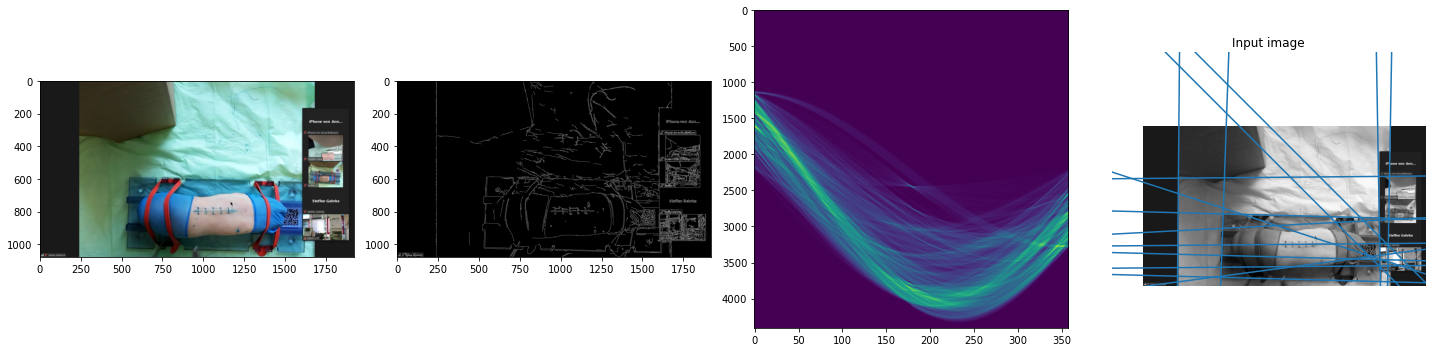

line angle=1.5533430342749535, dist=571.0
line angle=-1.562069680534925, dist=-135.0
line angle=-1.562069680534925, dist=-70.0
line angle=1.5533430342749535, dist=952.0
line angle=-1.3439035240356336, dist=-527.0
line angle=-0.593411945678072, dist=432.0
line angle=-1.4835298641951802, dist=-302.0
line angle=1.5533430342749535, dist=845.0
line angle=-1.5184364492350666, dist=-719.0
line angle=0.6981317007977319, dist=972.0
line angle=-1.2217304763960306, dist=-382.0
line angle=0.47123889803846897, dist=1125.0
line angle=0.008726646259971771, dist=405.0
line angle=0.008726646259971771, dist=1527.0
line angle=-0.17453292519943298, dist=1171.0
line angle=1.5446163880149815, dist=480.0
line angle=0.8552113334772216, dist=841.0
line angle=1.4224433403753785, dist=294.0
line angle=-0.03490658503988664, dist=1250.0
line angle=0.7853981633974483, dist=1218.0
line angle=-1.4398966328953218, dist=60.0
line angle=0.8028514559173918, dist=1375.0
line angle=-0.7853981633974483, dist=252.0


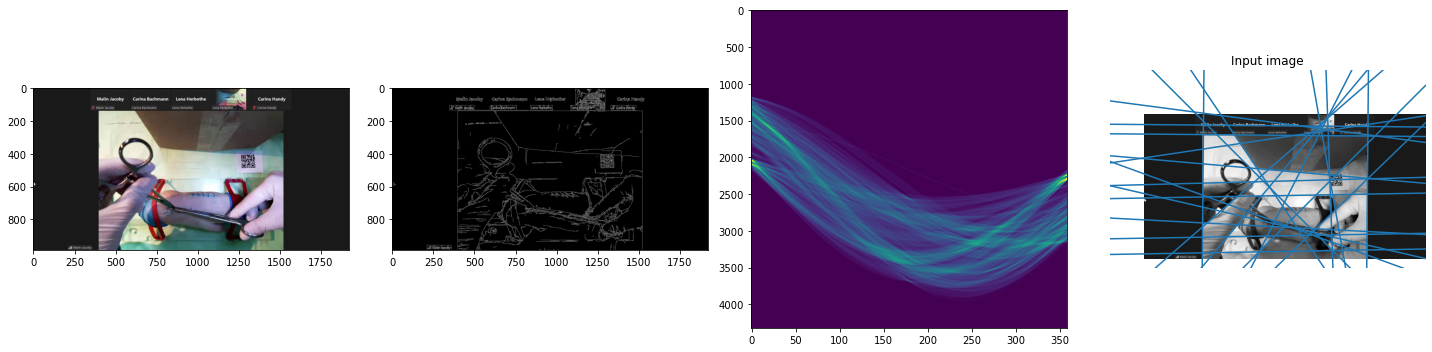

line angle=1.562069680534925, dist=407.0
line angle=-1.562069680534925, dist=-18.0
line angle=-1.562069680534925, dist=-101.0
line angle=-1.562069680534925, dist=-718.0
line angle=0.7853981633974483, dist=716.0
line angle=-0.008726646259971549, dist=274.0
line angle=0.7853981633974483, dist=839.0
line angle=-0.7853981633974483, dist=293.0
line angle=0.9773843811168246, dist=723.0
line angle=1.5271630954950384, dist=255.0
line angle=0.008726646259971771, dist=1090.0
line angle=0.7853981633974483, dist=646.0
line angle=-0.7853981633974483, dist=122.0
line angle=-1.1780972450961724, dist=4.0
line angle=-0.01745329251994332, dist=986.0
line angle=-0.7853981633974483, dist=375.0
line angle=-1.0122909661567112, dist=42.0
line angle=1.562069680534925, dist=481.0
line angle=1.439896632895322, dist=554.0
line angle=0.008726646259971771, dist=328.0
line angle=1.308996938995747, dist=372.0
line angle=0.6195918844579871, dist=636.0
line angle=1.2828170002158323, dist=700.0
line angle=-1.5533430342

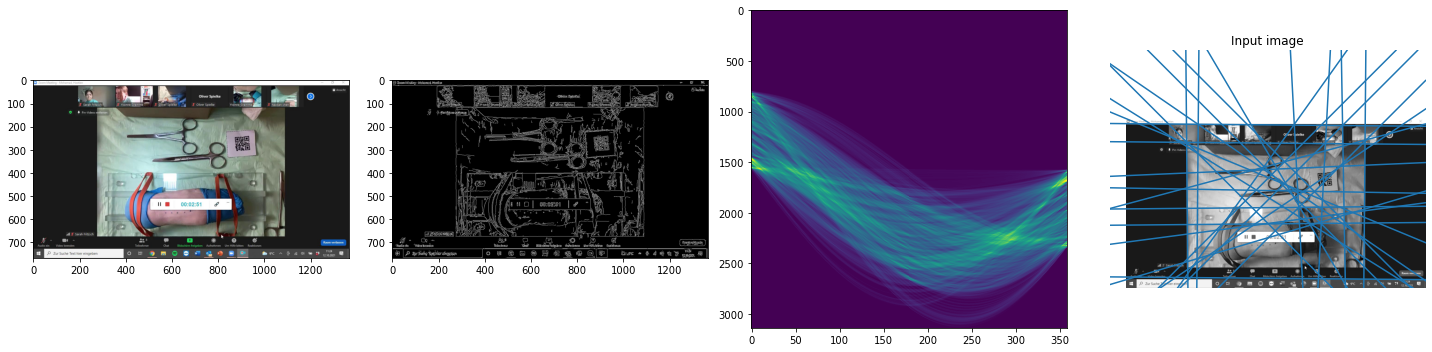

line angle=1.562069680534925, dist=135.0
line angle=-1.5533430342749532, dist=-629.0
line angle=-1.5446163880149817, dist=-890.0
line angle=-1.4922565104551517, dist=-16.0
line angle=-1.562069680534925, dist=-536.0
line angle=-0.5148721293383272, dist=507.0
line angle=-1.4922565104551517, dist=-298.0
line angle=0.008726646259971771, dist=1529.0
line angle=0.008726646259971771, dist=401.0
line angle=1.0035643198967397, dist=1041.0
line angle=1.562069680534925, dist=457.0


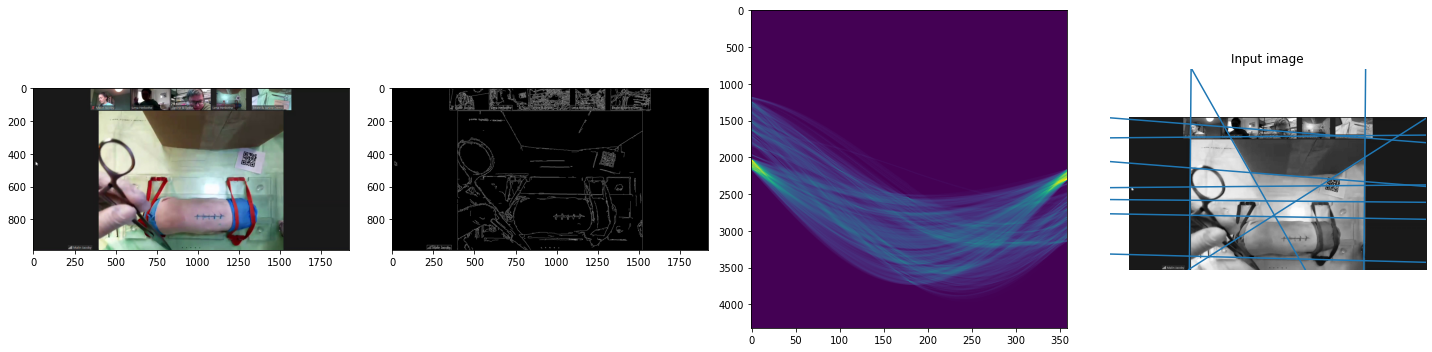

line angle=1.562069680534925, dist=136.0
line angle=-1.387536755335492, dist=43.0
line angle=-0.8726646259971648, dist=157.0


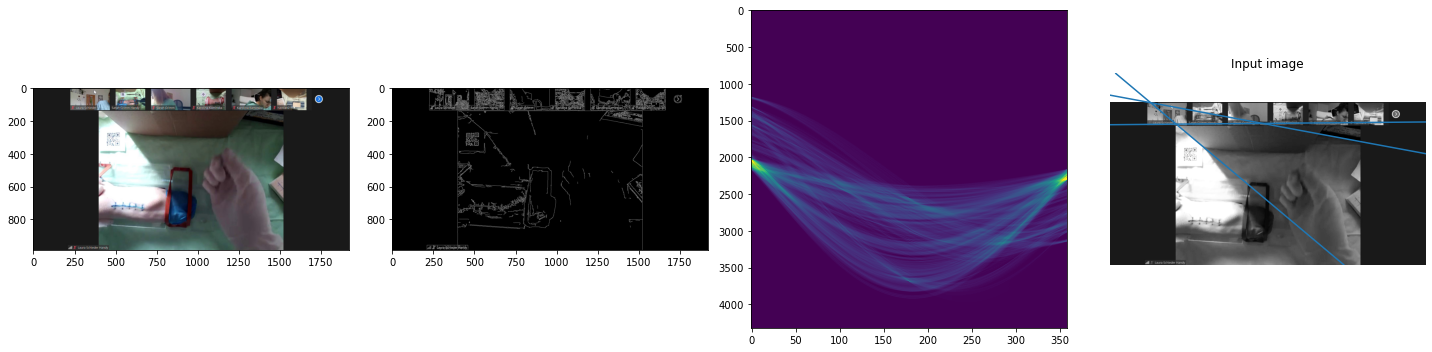

In [215]:
for pth in random.sample(list(dataset_path.glob("*")), 5):
    fig, axs = plt.subplots(1,4, figsize=(20,5))
    ax = axs.ravel()
    
    im = skimage.io.imread(pth)
    sh = im.shape
    # náhodně vyříznu menší část obrázku, abych na náhledech vůbec něco viděl
    # imcrop = im[int(sh[0]/2):,int(sh[1]/2):]
    imcrop = im
    ax[0].imshow(imcrop)
    
    image = skimage.color.rgb2gray(imcrop)
    
    # různé hranové operátory 
    # edges = (100*skimage.filters.roberts(image)).astype(np.uint8)
    # edges = (100*skimage.filters.sobel(image)).astype(np.uint8)
    # edges = np.abs(100 * skimage.filters.laplace(image)).astype(np.uint8)
    edges = canny(image, sigma=0, low_threshold=0.1)
    ax[1].imshow(edges, cmap="gray")
    
    
    # Hough transform
    
    # Tady vybíráme, které úhly budeme zkoušet
    # Classic straight-line Hough transform
    # Set a precision of 0.5 degree.
    tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False)
    
    # Odstraníme dokonale svislé a dokonale vodorovné úhly
    tested_angles = list(tested_angles)
    tested_angles.remove(0)
    tested_angles.remove(-np.pi/2)
    tested_angles = np.asarray(tested_angles)
    
    h, theta, d = hough_line(edges, theta=tested_angles)
    
    
    p = np.percentile(h.ravel(),99.99)
    ax[2].imshow(h, aspect='auto', clim=[0, p])


    ax[3].imshow(image, cmap=cm.gray)
    ax[3].set_title('Input image')
    ax[3].set_axis_off()
    
    for _, angle, dist in zip(*hough_line_peaks(h, theta, d, min_distance=50, min_angle=15)):
        print(f"line angle={angle}, dist={dist}")
        (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
        ax[3].axline((x0, y0), slope=np.tan(angle + np.pi/2))

    plt.tight_layout()
    plt.show()
    # plt.show()

## Ještě jsem si pohrával s hranovým operátorem, který hledá jen vodorovné hrany

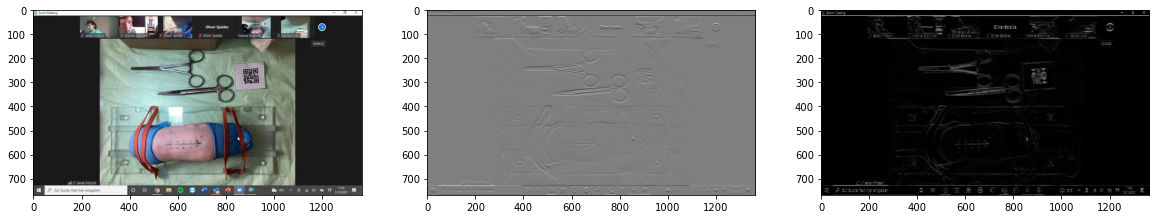

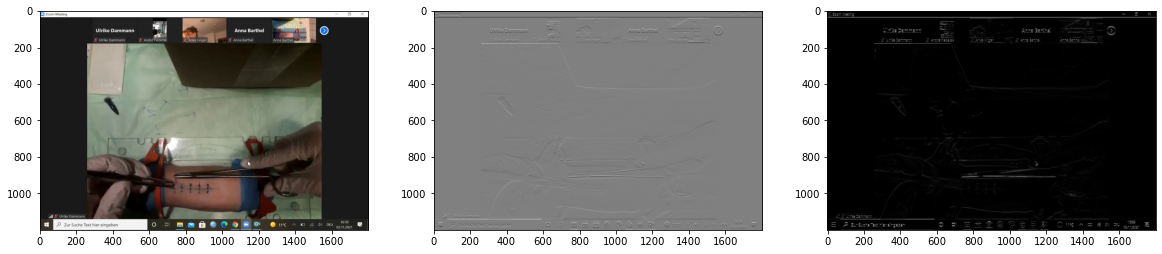

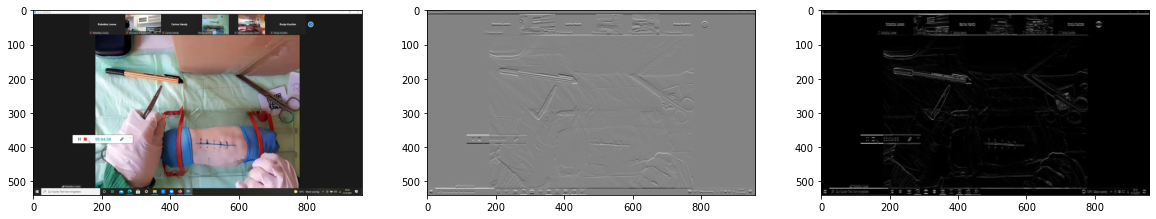

In [209]:
for pth in random.sample(list(dataset_path.glob("*")), 3):
    fig, axs = plt.subplots(1,3, figsize=(20,5))
    ax = axs.ravel()
    
    im = skimage.io.imread(pth)
    sh = im.shape
    # náhodně vyříznu menší část obrázku, abych na náhledech vůbec něco viděl
    # imcrop = im[int(sh[0]/2):,int(sh[1]/2):]
    imcrop = im
    ax[0].imshow(imcrop)
    
    image = skimage.color.rgb2gray(imcrop)
    # Tři různé hranové operátory - přesvědčivě nefunguje žádný
    edge_roberts = skimage.filters.roberts(image)
    edge_sobel = skimage.filters.sobel(image, axis=0)
    # edges = canny(image, sigma=2, low_threshold=0.01)
    edges = edge_sobel
    
    
    ax[1].imshow(edges, cmap="gray")
    ax[2].imshow(np.abs(edges), cmap="gray")